新的创新点思考总结：安全隐患的在线预测算法
https://shimo.im/docs/pJcWgJwtqgpKdKry

In [1]:
# 双变量相关性分析, page007
import numpy as np
X = np.array([65,72,78,65,72,70,65,68])
Y = np.array([72,69,79,69,84,75,60,73])
np.corrcoef(X,Y)

array([[1.        , 0.64897259],
       [0.64897259, 1.        ]])

In [2]:
# 散点输出，查看以上X,Y的相关性的可视化呈现
import matplotlib.pyplot as plt
plt.plot(X,Y,'.')
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# 加载鸢尾花数据集
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X,y = iris.data, iris.target
chiValues = chi2(X,y)
# SelectKBest(score_func,k)， score_func用于打分
# chi2为卡方
X_new = SelectKBest(chi2,k=2).fit_transform(X,y)

In [5]:
import numpy as np
np.size(X)

600

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [9]:
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file,sep='\t',encoding='utf-8')
test_data = pd.read_csv(test_data_file,sep='\t',encoding='utf-8')


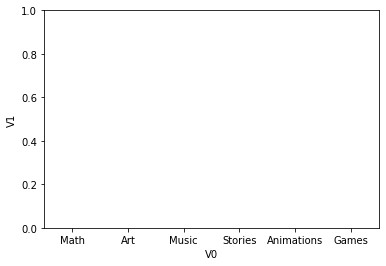

In [11]:
# 
sns.violinplot(x= "V0",y="V1",data=train_data,
               split=True,
               linewidth = 2, #线宽
               width = 0.8,   #箱之间的间隔比例
               palette = 'muted', #设置调色板
               order = ['Math' , 'Art' , 'Music' , 'Stories', 'Animations','Games'], #筛选类别
               gridsize = 50, #设置小提琴图的平滑度，越高越平滑
               )
plt.show()

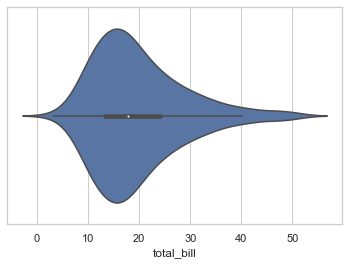

In [12]:
# 横向小提琴图
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
tips = sns.load_dataset("tips")
sns.violinplot(x=tips['total_bill'])
plt.show()

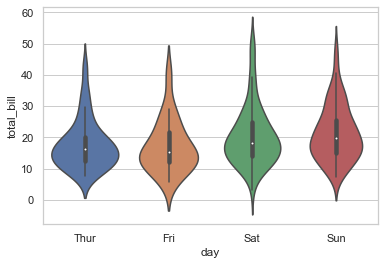

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
tips = sns.load_dataset("tips")
sns.violinplot(x="day",y='total_bill',data=tips)
plt.show()

In [1]:
# 数据探索 page 016
# 导入工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #matplotlib的封装，使得作图更容易
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 读取数据
train_data_file = "./zhengqi_train.txt"
test_data_file  = "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file,sep='\t',encoding='utf-8')
test_data  = pd.read_csv(test_data_file, sep='\t',encoding='utf-8')

In [5]:
# 查看数据
# 查看基本信息
train_data.info()
test_data.info()
# 查看统计信息
train_data.describe()
test_data.describe()
# 查看字段信息
train_data.head()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

<AxesSubplot:xlabel='V0'>

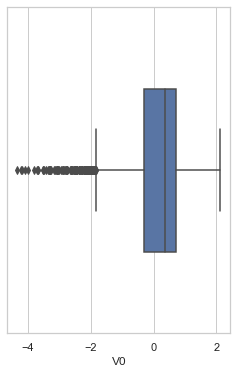

In [22]:
# page18 可视化数据分布
fig = plt.figure(figsize = (4,6))
# orient："v"|"h" 用于控制图像使水平还是竖直显示
sns.boxplot(train_data['V0'],orient="v",width=0.5)

In [6]:
# 绘制训练其中变量V0-V37的箱式图
# column = train_data.columns.tolist()[:39]
# fig = plt.figure(figsize=(80,60),dpi=75)
# for i in range(38):
#     plt.subplot(7,8,i+1)  #7行8列子图
#     sns.boxplot(train_data[column[i]],orient='v',width=0.5)
#     plt.ylabel(column[i],fontsize=36)
# plt.show()

In [13]:
# 基于预测模型来检测异常值
def find_outliers(model,X,y,sigma=3):
    
    #预测y_pred
    try:
        y_pred = pd.Series(model.predict(X),index=y.index)
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X),index=y.index)
        
    # outliers的检测方法
    #-----------------------------------------#
    resid = y-y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    z = (resid-mean_resid)/std_resid
    outliers = z[abs(z)>sigma].index
    #-----------------------------------------#
    plt.figure(figsize=(15,5))
    
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.title('y and y_predict')
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_132 = plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.title('error')
    plt.xlabel('y')
    plt.ylabel('y - y_pred')
    
    ax_133 = plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    
    return outliers

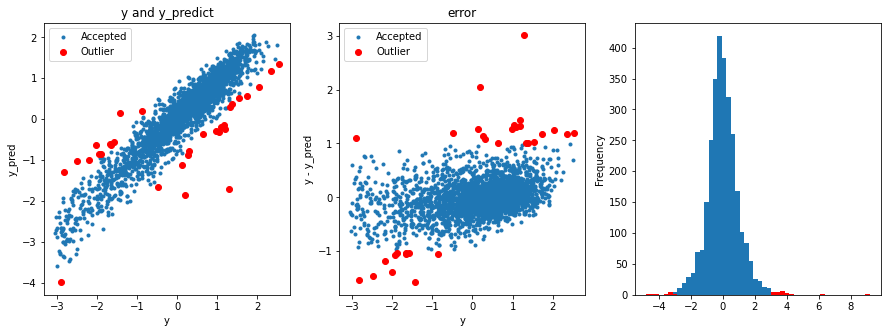

In [14]:
# 直方图，bin个数，异常值在直方图的体现
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train = train_data.iloc[:,0:-1]
y_train = train_data.iloc[:,-1]
outliers = find_outliers(Ridge(),X_train,y_train)

https://en.wikipedia.org/wiki/Kernel_density_estimation

https://baike.baidu.com/item/%E6%A0%B8%E5%AF%86%E5%BA%A6%E4%BC%B0%E8%AE%A1/10349033?fr=aladdin

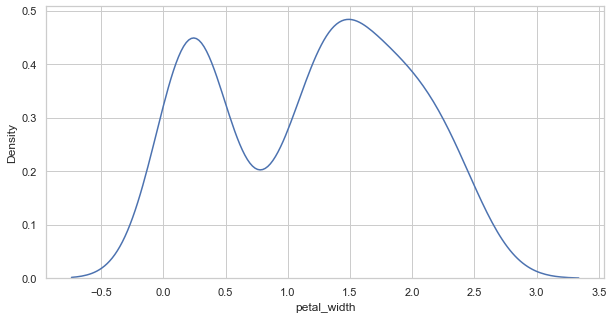

In [32]:
#核密度估计（kernel density estimation）是在概率论中用来估计未知的密度函数，属于非参数检验方法之一，
# 由Rosenblatt (1955)和Emanuel Parzen(1962)提出，又名Parzen窗（Parzen window）。
# Ruppert和Cline基于数据集密度函数聚类算法提出修订的核密度估计方法
from sklearn.datasets import load_iris
iris = sns.load_dataset('iris')
# iris=load_iris()
plt.figure(figsize=(10,5))
ax = sns.kdeplot(iris.petal_width)

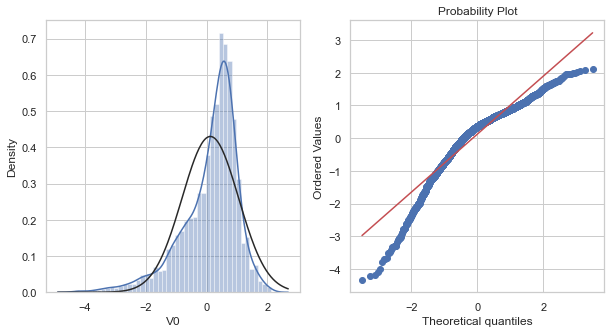

In [33]:
# 直方图和Q-Q图
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
# seaborn的displot()
# 集合了matplotlib的hist()与核函数估计kdeplot的功能，
# 增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途
sns.distplot(train_data['V0'],fit=stats.norm)

#q-q 图是通过比较数据和正态分布的分位数是否相等来判断数据是不是符合正态分布
ax = plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'],plot=plt)

In [34]:
train_rows = len(train_data.columns)
train_rows

39

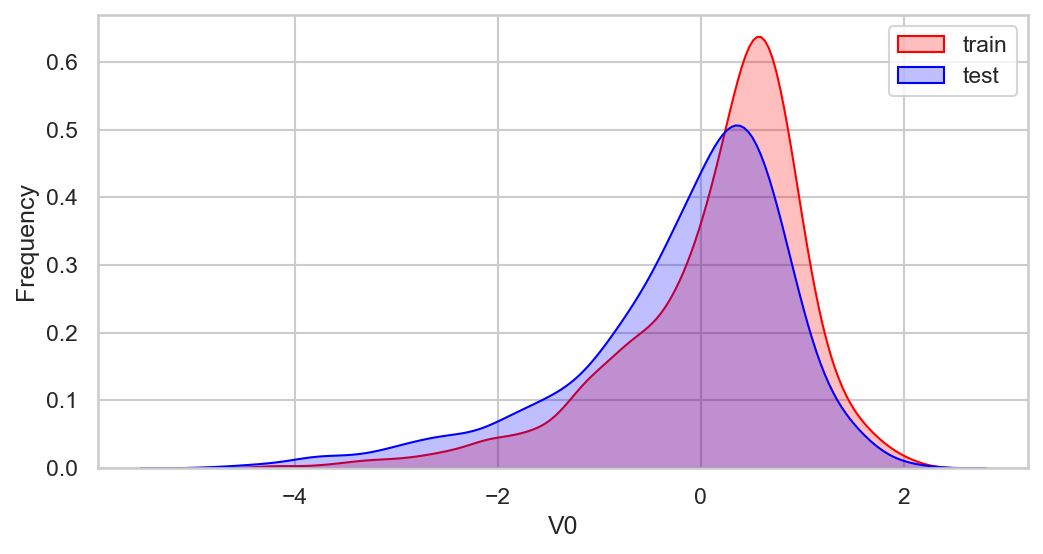

In [35]:
# 对比同一特征变量V0在训练集和测试集的分布情况，查看数据分布是否一致
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4),dpi=150)
ax = sns.kdeplot(train_data['V0'],color='Red',shade=True)
ax = sns.kdeplot(test_data['V0'],color='Blue',shade=True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax = ax.legend(['train','test'])
plt.show()

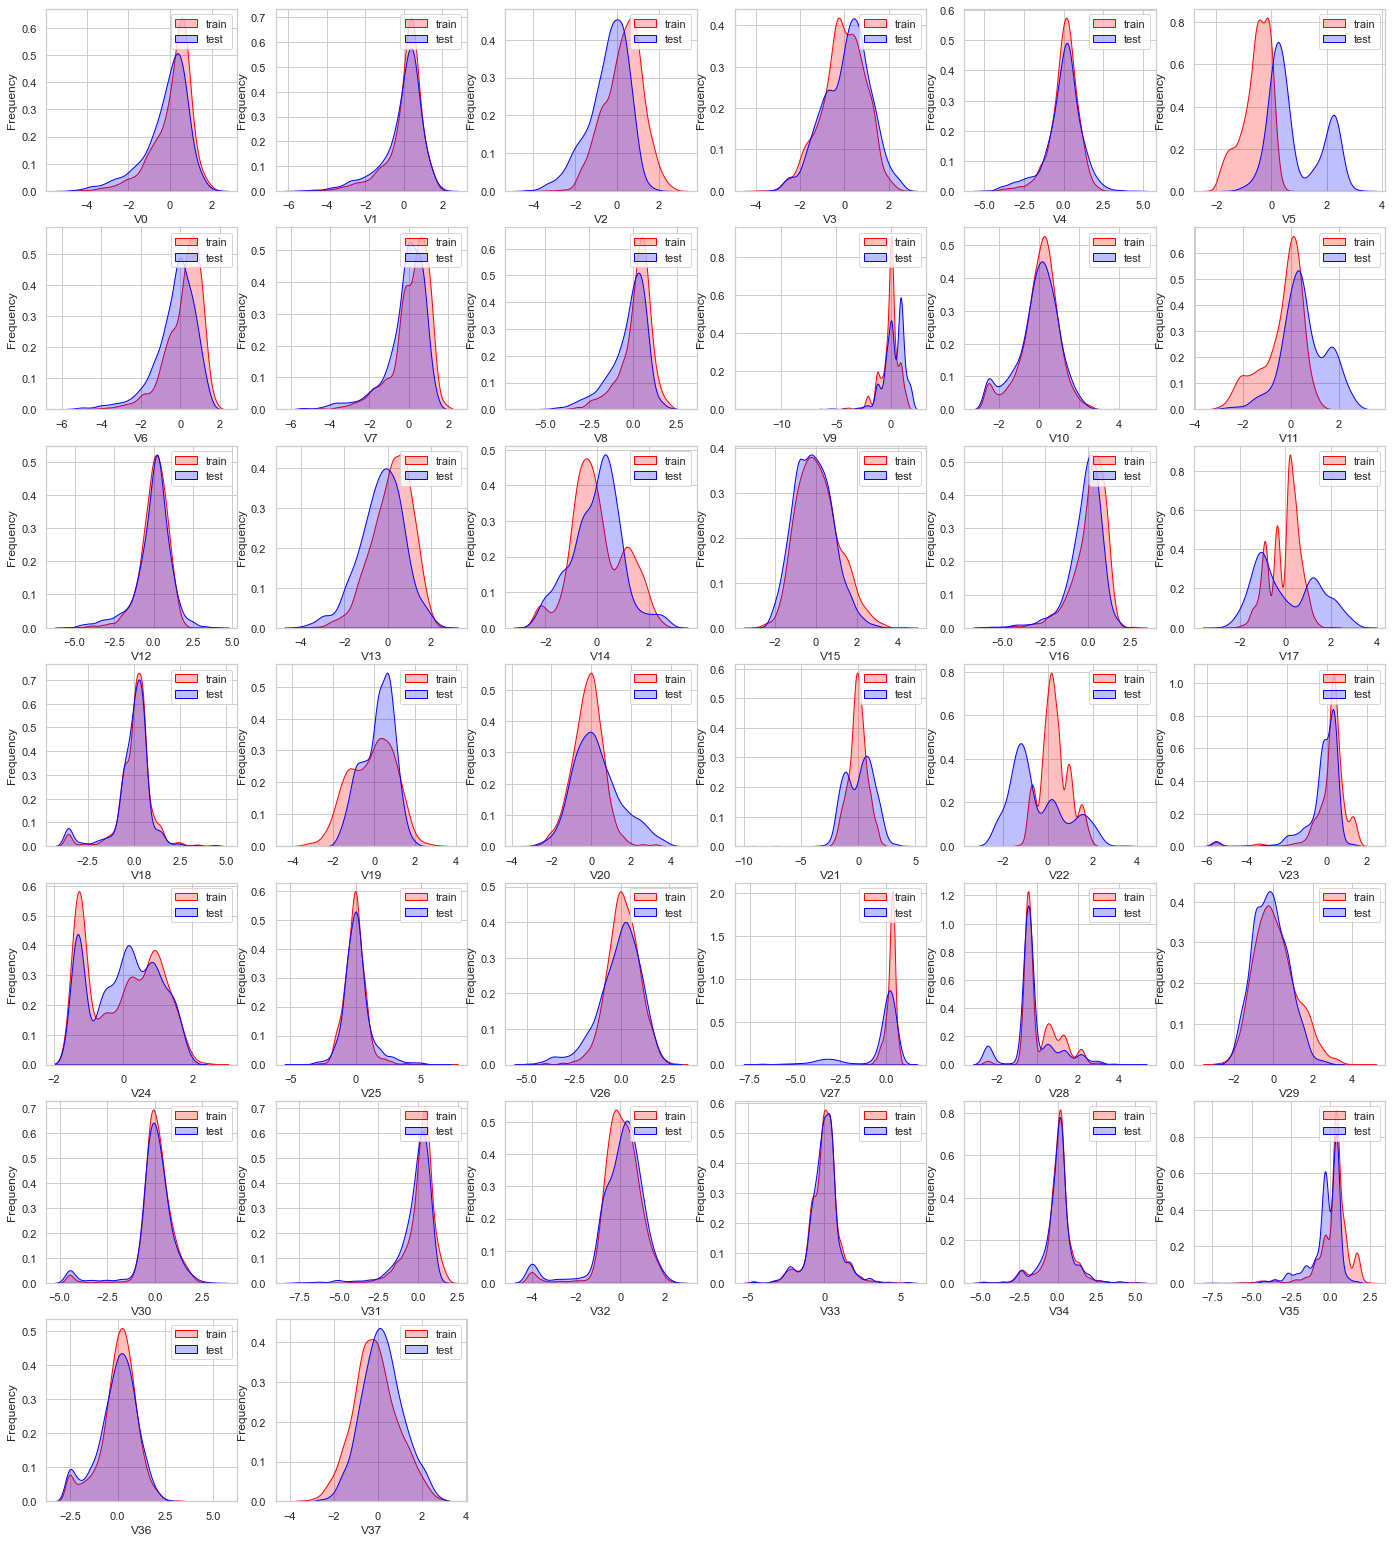

In [36]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize = (4*dist_cols, 4*dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(train_data[col],color='Red',shade=True)
    ax = sns.kdeplot(test_data[col],color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    i+=1
plt.show()

Text(0.5, 0, 'V0')

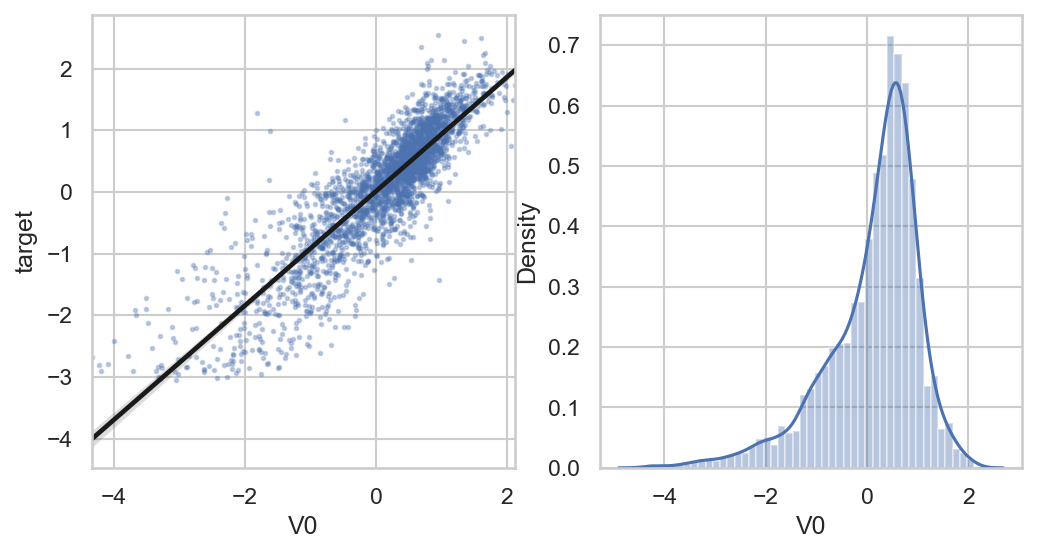

In [37]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4),dpi=150)
ax = plt.subplot(1,2,1)
# 绘图数据和线性回归模型拟合regplot
sns.regplot(x='V0',y='target',data=train_data,ax=ax,
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
           line_kws={'color':'k'})
plt.xlabel('V0')
plt.ylabel('target')

ax = plt.subplot(1,2,2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

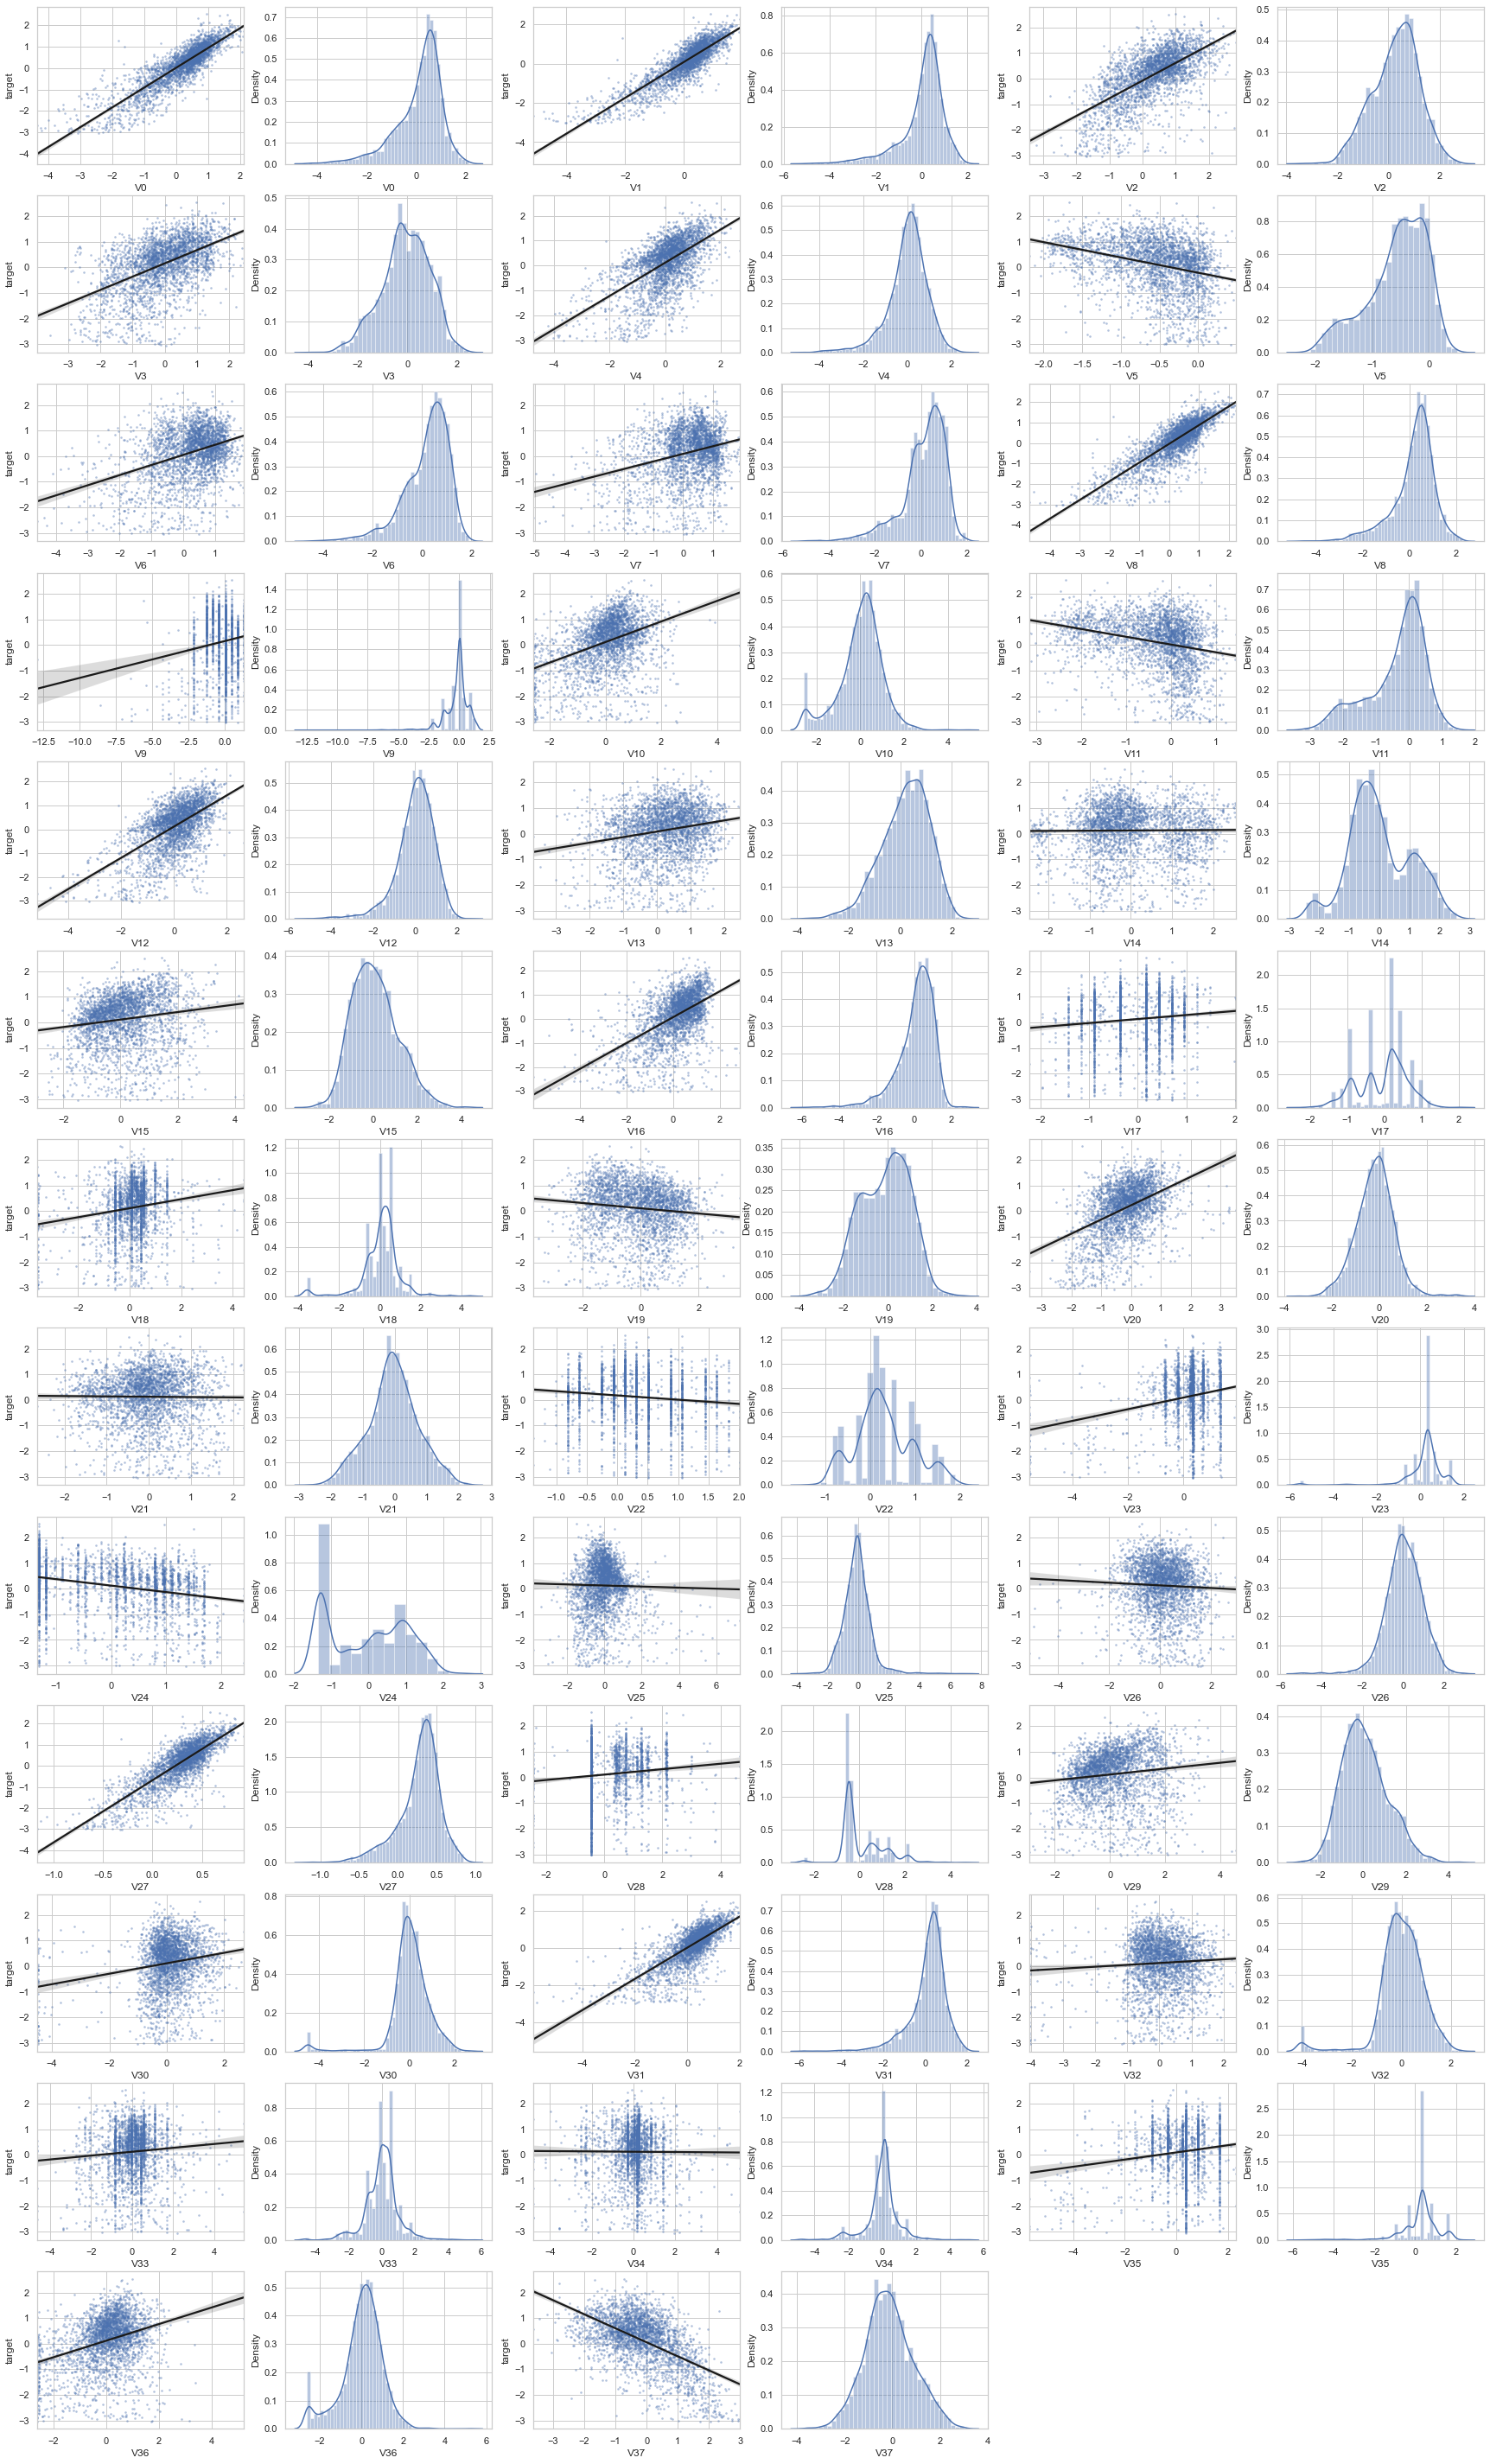

In [38]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,4*frows))
i = 0

for col in test_data.columns:
    i+=1
    ax = plt.subplot(frows,fcols,i)
    sns.regplot(x=col,y='target',data=train_data,ax=ax,
               scatter_kws={'marker':'.', 's':3, 'alpha':0.3},
               line_kws={'color':'k'})
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax = plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

In [39]:
# 计算数据集的相关性系数
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
train_corr = data_train1.corr()
train_corr


V0        V1        V2        V3        V4  ...       V34  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  ... -0.019342   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  ... -0.029115   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  ... -0.025620   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  ... -0.031898   
V4      0.781212  0.657790  0.057697  0.315046  1.000000  ...  0.028659   
...          ...       ...       ...       ...       ...  ...       ...   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659  ...  1.000000   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  ...  0.233616   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  ... -0.019032   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054  ... -0.006854   
target  0.873212  0.871846  0.638878  0.512074  0.603984  ... -0.006034   

             V35       V36       V37    target  
V0      0.138933  0.231417 -0.494076  0.873212  
V1      0.146329  0.235299 -0.494043  0.871846  
V2      0.043648  0.316462 -0.734956  0.638878  
V3      0.080034  0.324475 -0.229613  0.512074  
V4      0.100010  0.113609 -0.031054  0.603984  
...          ...       ...       ...       ...  
V34     0.233616 -0.019032 -0.006854 -0.006034  
V35     1.000000  0.025401 -0.077991  0.140294  
V36     0.025401  1.000000 -0.039478  0.319309  
V37    -0.077991 -0.039478  1.000000 -0.565795  
target  0.140294  0.319309 -0.565795  1.000000  

[33 rows x 33 columns]

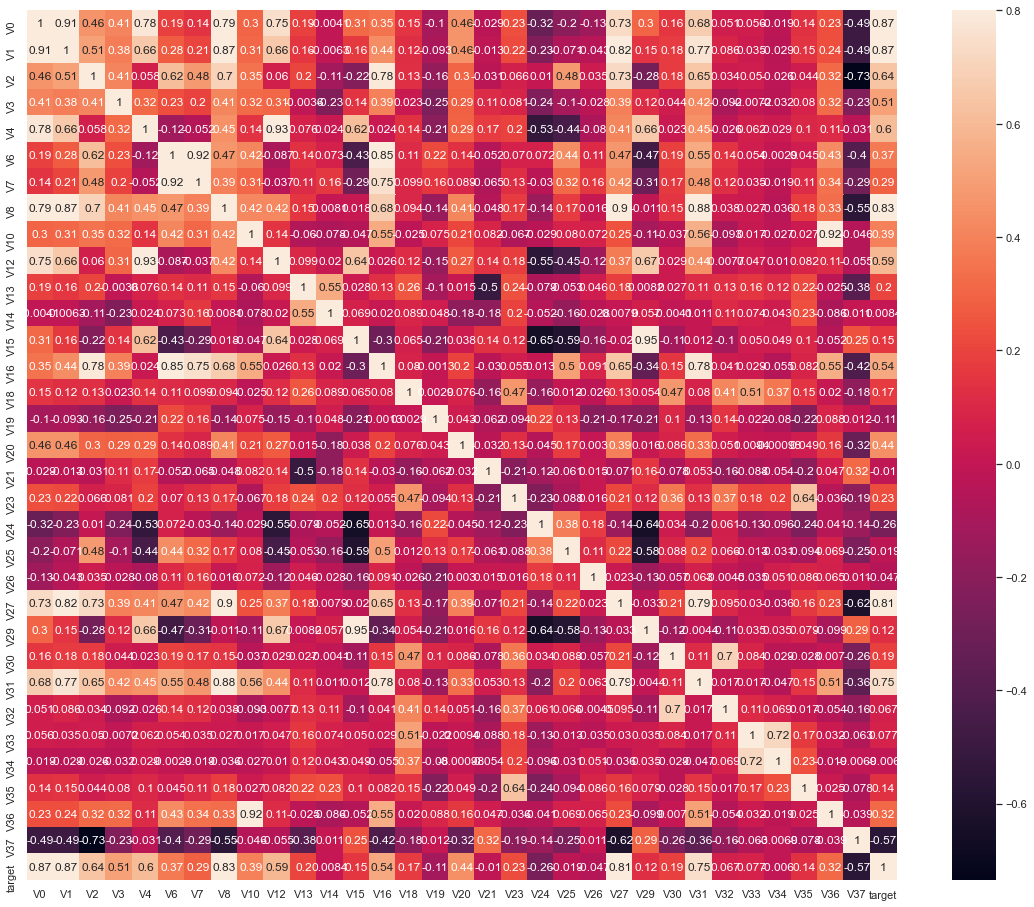

In [40]:
# 画出相关性热力图
ax = plt.figure(figsize= (20,16))
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)

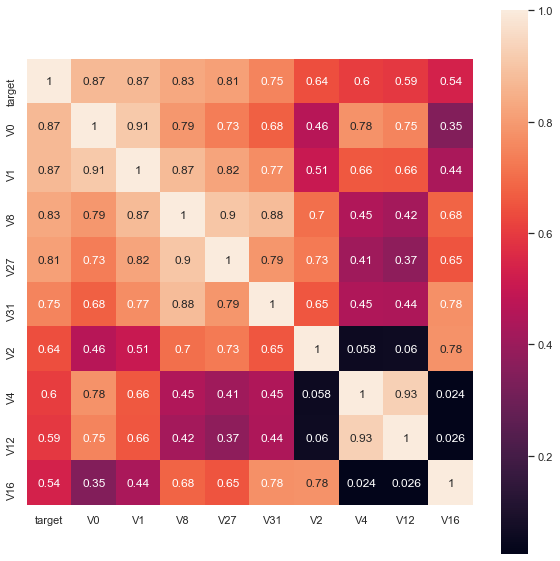

In [41]:
k=10
# 筛选出相关系数与target最相关的k个特征变量
cols = train_corr.nlargest(k,'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.figure(figsize=(10,10))
hm = sns.heatmap(train_data[cols].corr(),annot=True,square=True)
plt.show()

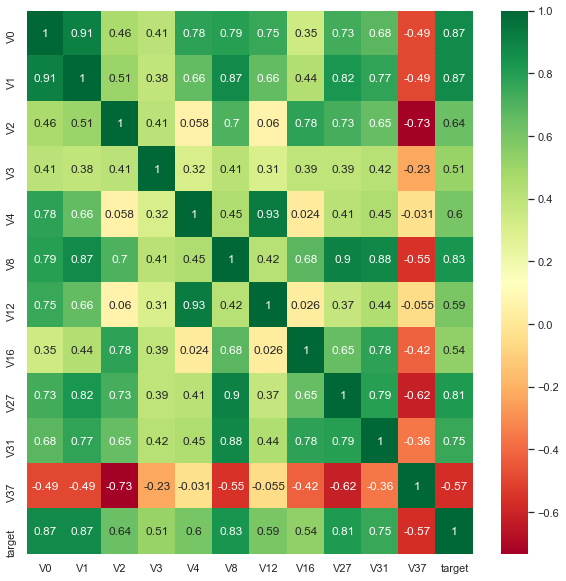

In [42]:
# 找出与target变量相关系数大于0.5的特征变量
threshold = 0.5
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"])>threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),
               annot=True,
               cmap="RdYlGn")

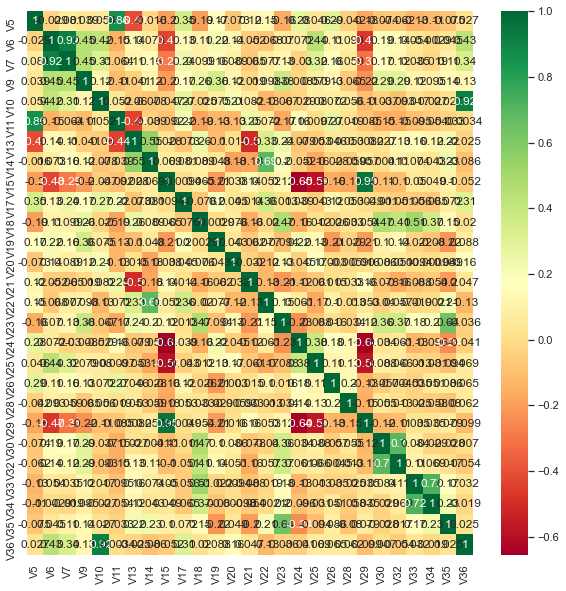

In [43]:
threshold = 0.5
corr_matrix = train_data.corr().abs()
drop_col = corr_matrix[corr_matrix['target']<threshold].index
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[drop_col].corr(),
               annot=True,
               cmap="RdYlGn")

In [44]:
# 进行box-cox之前，需要对数据转换，归一化处理
drop_columns = ['V5','V9','V11','V17','V22','V28']
train_x = train_data.drop(['target'],axis=1)
data_all = pd.concat([train_data,test_data])
data_all.drop(drop_columns,axis=1,inplace=True)
data_all.head()

V0     V1     V2     V3     V4  ...    V34    V35    V36    V37  target
0  0.566  0.016 -0.143  0.407  0.452  ... -4.789 -5.101 -2.608 -3.508   0.175
1  0.968  0.437  0.066  0.566  0.194  ...  0.160  0.364 -0.335 -0.730   0.676
2  1.013  0.568  0.235  0.370  0.112  ...  0.160  0.364  0.765 -0.589   0.633
3  0.733  0.368  0.283  0.165  0.599  ... -0.065  0.364  0.333 -0.112   0.206
4  0.684  0.638  0.260  0.209  0.337  ... -0.215  0.364 -0.280 -0.028   0.384

[5 rows x 33 columns]

In [45]:
# 归一化前的数据描述
data_all.describe()

V0           V1           V2           V3           V4  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.000080     0.000082    -0.000043    -0.000013     0.000085  ...   
std       1.000013     1.000016     1.000007     0.999995     1.000015  ...   
min      -4.814000    -5.488000    -4.283000    -3.956000    -4.921000  ...   
25%      -0.468000    -0.319000    -0.625000    -0.651000    -0.428000  ...   
50%       0.245000     0.237000     0.105000     0.073000     0.114000  ...   
75%       0.666000     0.595000     0.698000     0.704000     0.576000  ...   
max       2.121000     2.120000     2.828000     2.603000     4.475000  ...   

               V34          V35          V36          V37       target  
count  4813.000000  4813.000000  4813.000000  4813.000000  2888.000000  
mean      0.000036    -0.000079    -0.000110     0.000083     0.126353  
std       0.999998     1.000062     1.000019     1.000017     0.983966  
min      -4.789000    -7.477000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.349000    -0.485000    -0.666000    -0.350250  
50%       0.160000     0.364000     0.115000    -0.043000     0.313000  
75%       0.273000     0.364000     0.647000     0.647000     0.793250  
max       5.110000     2.324000     5.238000     3.021000     2.538000  

[8 rows x 33 columns]

In [46]:
cols_numeric = list(data_all.columns)
def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
data_all[cols_numeric].describe()

V0           V1           V2           V3           V4  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.694172     0.721357     0.602300     0.603139     0.523743  ...   
std       0.144198     0.131443     0.140628     0.152462     0.106430  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626676     0.679416     0.514414     0.503888     0.478182  ...   
50%       0.729488     0.752497     0.617072     0.614270     0.535866  ...   
75%       0.790195     0.799553     0.700464     0.710474     0.585036  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V34          V35          V36          V37       target  
count  4813.000000  4813.000000  4813.000000  4813.000000  2888.000000  
mean      0.483790     0.762873     0.332385     0.545795     0.567960  
std       0.101020     0.102037     0.127456     0.150356     0.176275  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.454490     0.727273     0.270584     0.445647     0.482578  
50%       0.499949     0.800020     0.347056     0.539317     0.601397  
75%       0.511365     0.800020     0.414861     0.643061     0.687433  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 33 columns]

In [47]:
cols_numeric[:-1]

['V0',
 'V1',
 'V2',
 'V3',
 'V4',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V18',
 'V19',
 'V20',
 'V21',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37']

In [48]:
train_data_process = train_data[cols_numeric[:-1]]
train_data_process = train_data_process[cols_numeric[:-1]].apply(scale_minmax,axis=0)

test_data_process = test_data[cols_numeric[:-1]]
test_data_process = test_data_process[cols_numeric[:-1]].apply(scale_minmax,axis=0)


In [49]:
# 训练集单独做归一化处理
train_data_process.describe()

V0           V1           V2           V3           V4  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean      0.690528     0.735521     0.593745     0.606301     0.639876  ...   
std       0.143747     0.133738     0.145844     0.151302     0.119550  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.625465     0.695419     0.497279     0.515165     0.586328  ...   
50%       0.727076     0.766264     0.609155     0.609933     0.652940  ...   
75%       0.783922     0.812642     0.694342     0.714174     0.712185  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V33          V34          V35          V36          V37  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.459255     0.484465     0.734850     0.336306     0.527854  
std       0.099782     0.101353     0.122917     0.123733     0.153423  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.409037     0.454490     0.684936     0.279760     0.427112  
50%       0.454518     0.499949     0.755580     0.349860     0.519532  
75%       0.504261     0.511365     0.785260     0.414511     0.622210  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

In [50]:
test_data_process.describe()

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.669597     0.710316     0.617794     0.574531     0.521693  ...   
std       0.155240     0.141518     0.155649     0.176038     0.122104  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.600231     0.662066     0.530583     0.447695     0.470839  ...   
50%       0.705670     0.746977     0.644726     0.594659     0.536292  ...   
75%       0.775673     0.798764     0.732220     0.692125     0.588655  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.457349     0.482778     0.784882     0.468409     0.556264  
std       0.098071     0.100537     0.103509     0.190319     0.147730  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.412901     0.454490     0.779187     0.368440     0.457672  
50%       0.454518     0.499949     0.787822     0.492046     0.549395  
75%       0.500000     0.511365     0.857127     0.595904     0.650699  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

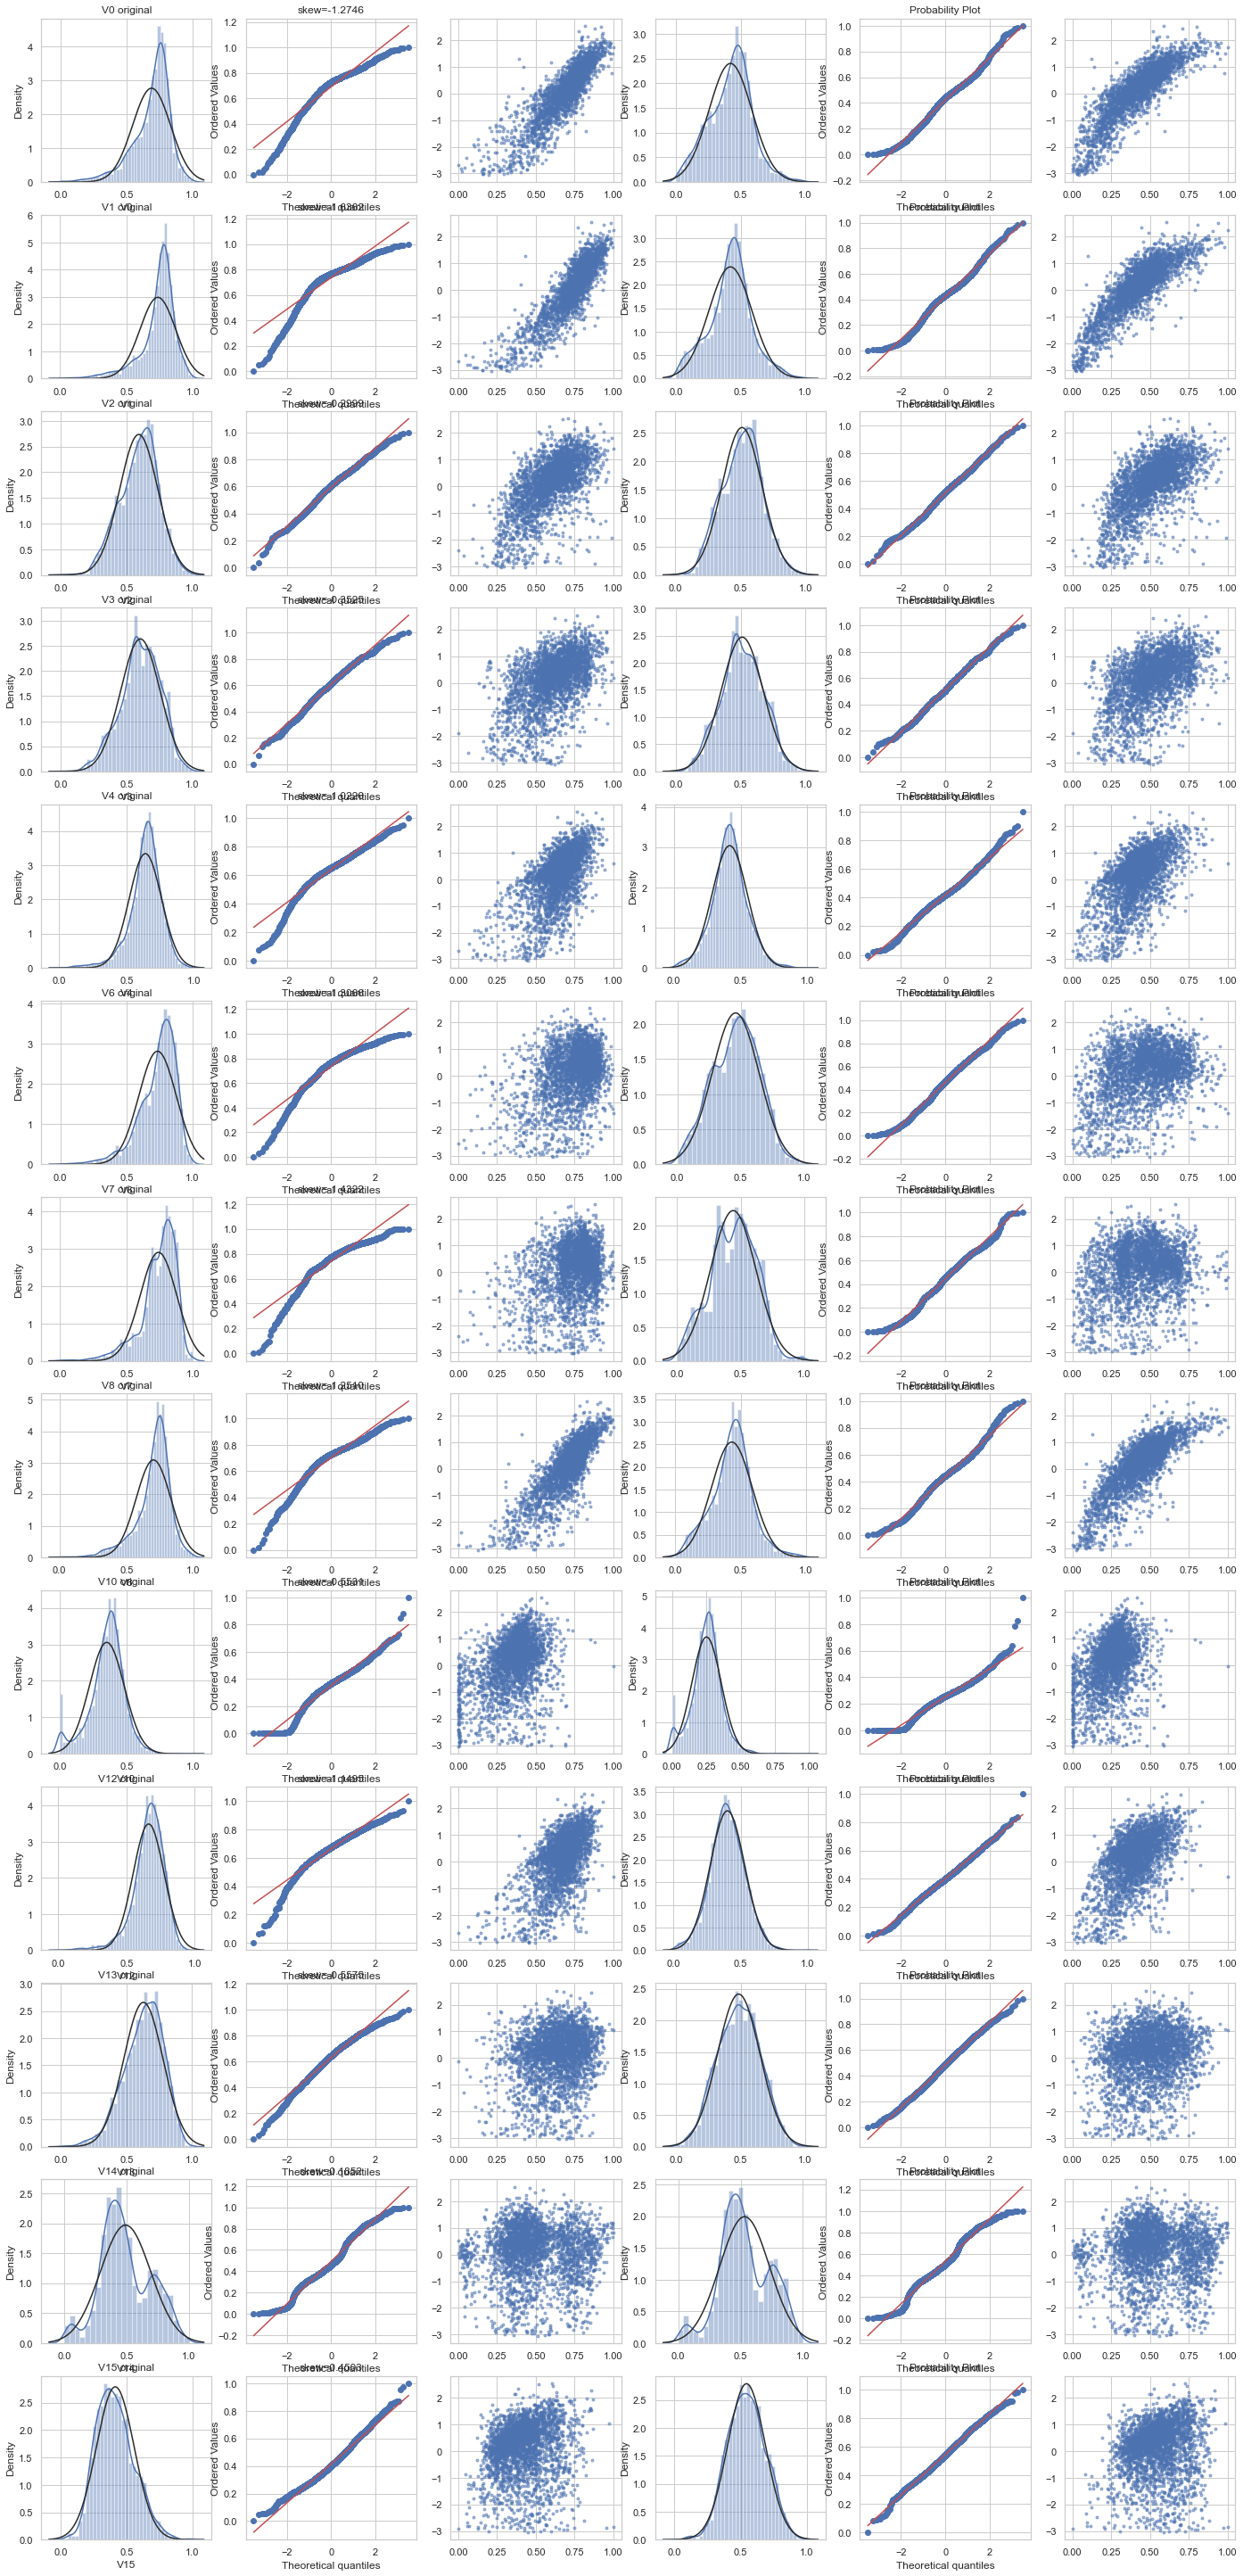

In [51]:
cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]
train_data_process = pd.concat([train_data_process, train_data['target']],axis=1)
fcols =6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols,4*frows))

i=0

for var in cols_numeric_left:
    dat = train_data_process[[var,'target']].dropna()
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var],fit=stats.norm)  #画distplot图
    plt.title(var+' original')
    
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[var],plot=plt) #QQ图
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var],dat['target'],'.',alpha=0.5)
    
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var,lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var,fit=stats.norm)
    
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var,plot=plt)
    
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var,dat['target'],'.',alpha=0.5)    
plt.show()